This code is a modification of [this file](https://github.com/aarongarrett/inspyred/blob/master/examples/standard/nsga_example.py).
The complete file of this notebook is [here](https://gist.github.com/pabloQuispe/65fda3d2fd7e976bdc49562e3e3bb1c5)
### Choosing libraries
Importing required libraries to run script. To install inspyred library see [here](https://github.com/aarongarrett/inspyred/blob/master/docs/installation.rst)

In [9]:
from random import Random
from time import time
import inspyred
import csv

Initializing seed with current time. You can set a constant number to compare different algorithms or parameters.<br /> display is set to True to plot the results.

In [11]:
display=True

prng = Random()
prng.seed(time())

### Choosing problem and method to solve
The Kursawe problem is chosen for test, for more information about test functions [here](http://aarongarrett.github.io/inspyred/reference.html#multi-objective-benchmarks).
The second line gets the algorithm NSGA2 from the library.<br />
* Defaults values for NSGA-II:
    * Selection: Tournament selection, size: 2. It randomly picks 2 values and choose the best.
    * Archive : best_archive, it saves the best solutions through time

In [12]:
problem = inspyred.benchmarks.Kursawe(3)
ea = inspyred.ec.emo.NSGA2(prng)

### Choosing the crossover and mutation 
For this case: blend_crossover and gaussian_mutation.<br />
More about variators (it comprises crossover and mutation functions) [here](http://aarongarrett.github.io/inspyred/reference.html#variators-solution-variation-methods).<br />
Besides, the termination criteria is chosen, for this case it's the number of generations.

In [13]:
ea.variator = [inspyred.ec.variators.blend_crossover,
               inspyred.ec.variators.gaussian_mutation]

ea.terminator = inspyred.ec.terminators.generation_termination

The following parameters are set in *evolve*:
* Generator: It generates the initial population
* Evaluator: It is used to compute the fitness of the individual
* Population size  
* Bounder: It bounds the value if they exceed certain values 
* Maximize: Use to determine if it is a maximization or minimization problem
* Maximum number of iterations 

<br />
Besides we can change default parameters of the crossover and mutation function
* crossover_rate
* mutation_rate

In [14]:
final_pop = ea.evolve(generator=problem.generator,
                      evaluator=problem.evaluator,
                      pop_size=100,
                      maximize=problem.maximize,
                      bounder=problem.bounder,
                      max_generations=100,
                      crossover_rate = 1,
                      mutation_rate=0.1)

### Plotting the Pareto-front optimal
Plot the results and save in pdf. Remember that *archive* for this case stores the best values through time

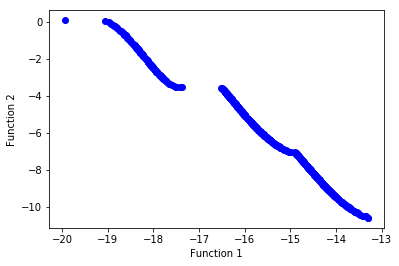

In [15]:
if display:
    final_arc = ea.archive
    #print('Best Solutions: \n')
    #for f in final_arc:
        #print(f)
    import matplotlib.pyplot as plt
    x = []
    y = []
    for f in final_arc:
        x.append(f.fitness[0])
        y.append(f.fitness[1])
    plt.scatter(x, y, color='b')
    plt.xlabel("Function 1")
    plt.ylabel("Function 2")
    #Plot and save in pdf format
    plt.savefig('{0} Example ({1}).pdf'.format(ea.__class__.__name__,
                                               problem.__class__.__name__),
                format='pdf')
    plt.show()

### Save results in csv file 
The name of the columns is store in fieldnames. First the variable names then the objectives' name. This is the order in which values will be store in the csv file.

In [16]:
fieldnames = ['x0', 'x1', 'x2','f1','f2']

listCandidate stores the candidates value and objective functions

In [17]:
listCandidate = []
for f in final_arc:
    listCandidate.append(f.candidate + f.fitness.values)

my_list stores a list of dictionaries

In [18]:
my_list = []
for values in listCandidate:
    temp = zip(fieldnames, values)
    inner_dict = dict(temp)
    my_list.append(inner_dict)

The following code stores the values in "Pareto_Optimal_Solutions.csv". writeheader() writes a row with the values in fieldnames. Then with the for loop, every candidate is written in the csv.

In [19]:
with open("Pareto_Optimal_Solutions.csv", "wb") as out_file:
    writer = csv.DictWriter(out_file, fieldnames=fieldnames)
    writer.writeheader()
    for row in my_list:
        writer.writerow(row)
    out_file.close()